In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import importlib

module_path = '/Users/morton/PycharmProjects/psifr'
if module_path not in sys.path:
    sys.path.append(module_path)
from psifr import fr
data_file = os.path.join(module_path, 'data', 'cfr_raw_data.csv')

In [2]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, list_keys=['list_type'], study_keys=['category'])

In [3]:
importlib.reload(fr)
crp = fr.lag_crp(data)

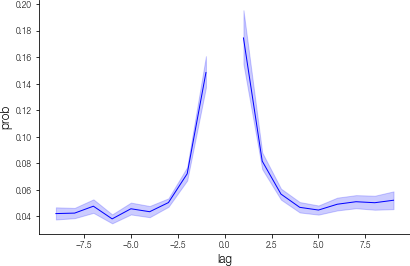

In [4]:
sns.lineplot(x='lag', y='prob', data=crp.query('-10 < lag < 0'), color='b');
sns.lineplot(x='lag', y='prob', data=crp.query('10 > lag > 0'), color='b');